# Import Packages and Dataset

In [1]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# logistic regression model
import statsmodels.api as sm 

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('raw/WA_Fn-UseC_-Telco-Customer-Churn.csv',
                index_col='customerID')

In [3]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


<b>Action: </b>SeniorCitizen is a binary variable, so I will transform 0 and 1 to "No" and "Yes", respectively. It is important to note, all variables will be numeric before any model diagnotics take place.

In [4]:
df['SeniorCitizen'].replace({0:'No', 1:'Yes'}, inplace=True)

# Review Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


<b>Review: </b> After reviewing in column datatypes, TotalCharges looks as if should be numeric.

<b>Action: </b> Investigate this further.

<b>Review: </b> There look to be blank values in the TotalCharges column.

<b>Action: </b> Complete the following tasks:

+ Use the strip function to remove whitespace and convert the blanks to null values. 
+ Convert the column to a float datatype
+ Review the missing values and determine if the mean or median should be input inplace of blanks

In [6]:
#Strip out whitespace
df['TotalCharges'] = df['TotalCharges'].str.strip()
#Covnert blanks to null values
df['TotalCharges'].replace({'':0}, inplace=True)
df['TotalCharges'].replace({0:df.loc[:,"TotalCharges"].median()}, inplace=True)

#Convert datatype from object to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [7]:
#Review the columns with null values in the dataset
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns=['Amount'])
nulls = nulls.loc[nulls['Amount'] > 0]
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls = pd.DataFrame(nulls.loc[nulls['Amount'] > 0])
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls.index.name='Columns With Missing Values'
nulls

,Amount
Columns With Missing Values,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026123CDB588>]],
      dtype=object)

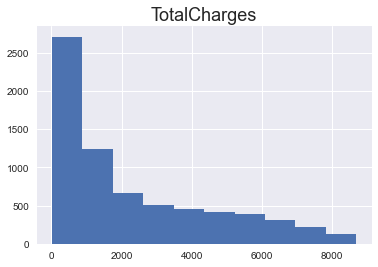

In [8]:
df.hist('TotalCharges', bins=10)

In [9]:
#Review the columns with null values in the dataset
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns=['Amount'])
nulls = nulls.loc[nulls['Amount'] > 0]
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls = pd.DataFrame(nulls.loc[nulls['Amount'] > 0])
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls.index.name='Columns With Missing Values'
nulls

,Amount
Columns With Missing Values,


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB

<b>Review: </b>There are no more missing values. Proceed to the Exploratory Data Analysis Portion of this analysis.

# Exploratory Data Analysis

## Assess and Remove Outliers

In [11]:
df.select_dtypes(include='number').describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2281.91
std,24.56,30.09,2265.27
min,0.00,18.25,18.80
25%,9.00,35.50,402.23
50%,29.00,70.35,1394.55
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


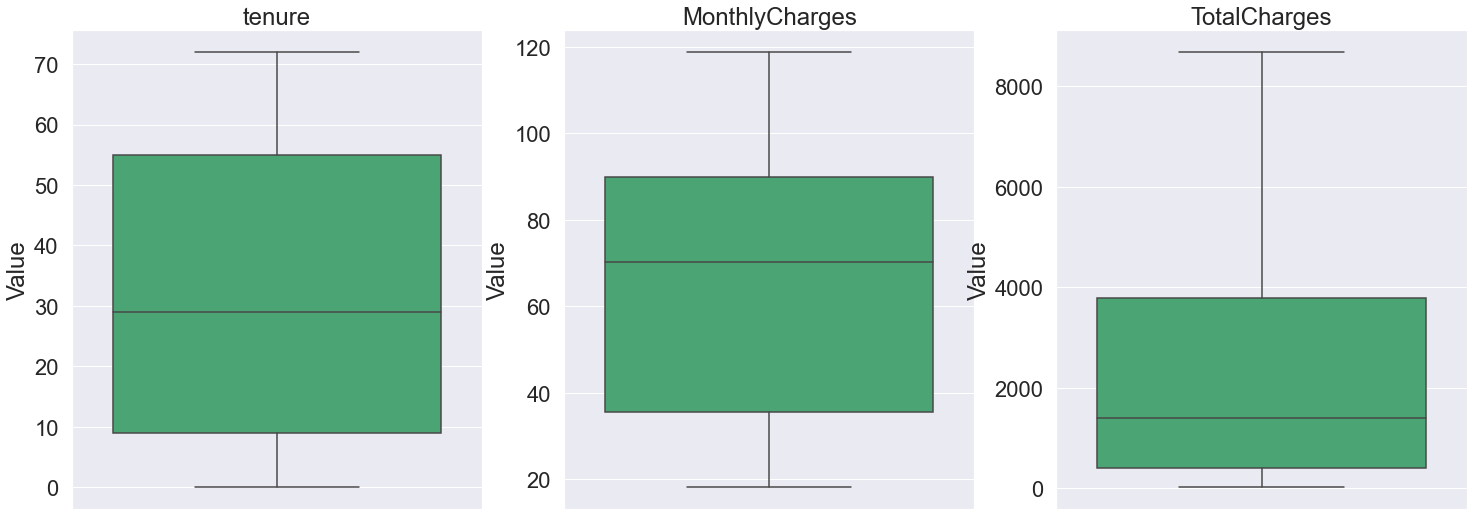

In [12]:
feature_num = list(enumerate(df[['tenure', 'MonthlyCharges','TotalCharges']].columns))
feature_num
plt.figure(figsize = (25,125))
sns.set(font_scale = 2)

for i in feature_num:
    plt.subplot(12,3,i[0]+1)
    sns.boxplot(y = i[1],
                   data = df,
                   color='mediumseagreen')

    plt.title(str(i[1]))
    plt.ylabel('Value')
    plt.xticks(rotation = 45)

<b>Action: </b> Review the 99th and 1st percentiles to determine how I would like to proceed with outliers.

In [13]:
ten_Q99 = np.percentile(df['tenure'], 99)
print(f'The 99th percentile in tenure is:{ten_Q99}')
ten_Q1 = np.percentile(df['tenure'], 1)
print(f'The 1st percentile in tenure is:{ten_Q1}\n')

mon_chg_Q99 = np.percentile(df['MonthlyCharges'], 99)
print(f'The 99th percentile in MonthlyCharges is:{mon_chg_Q99}')
mon_chg_Q99 = np.percentile(df['MonthlyCharges'], 1)
print(f'The 1st percentile in MonthlyCharges is:{mon_chg_Q99}\n')

cust_ten_Q99 = np.percentile(df['TotalCharges'], 99)
print(f'The 99th percentile in TotalCharges is:{cust_ten_Q99}')
cust_ten_Q1 = np.percentile(df['TotalCharges'], 1)
print(f'The 1st percentile in TotalCharges is:{cust_ten_Q1}\n')

The 99th percentile in tenure is:72.0
The 1st percentile in tenure is:1.0

The 99th percentile in MonthlyCharges is:114.729
The 1st percentile in MonthlyCharges is:19.2

The 99th percentile in TotalCharges is:8039.255999999999
The 1st percentile in TotalCharges is:19.9



<b>Action: </b> Below is a summary of the action to take for each columns:

tenure column:
+ Ceiling: Use 99th percentile at 72
+ Floor: Use 0 as the lowest allowable value

MonthlyCharges columns:
+ Ceiling: Use a number approximating the 99th percentile ($114.73)
+ Floor: Use 0 as the lowest allowable value

TotalCharges columns:
+ Ceiling: Use a number approximating the 99th percentile ($8039.26)
+ Floor: Use 0 as the lowest allowable value

In [14]:
ten_99 = np.percentile(df['tenure'],99)
df.loc[df['tenure']>ten_99, 'tenure'] = ten_99
df.loc[df['tenure']<0, 'tenure'] = 0

mc_99 = np.percentile(df['MonthlyCharges'],99)
df.loc[df['MonthlyCharges']>mc_99, 'MonthlyCharges'] = mc_99
df.loc[df['MonthlyCharges']<0, 'MonthlyCharges'] = 0

tc_99 = np.percentile(df['TotalCharges'],99)
df.loc[df['TotalCharges']>tc_99, 'TotalCharges'] = tc_99
df.loc[df['TotalCharges']<0, 'TotalCharges'] = 0

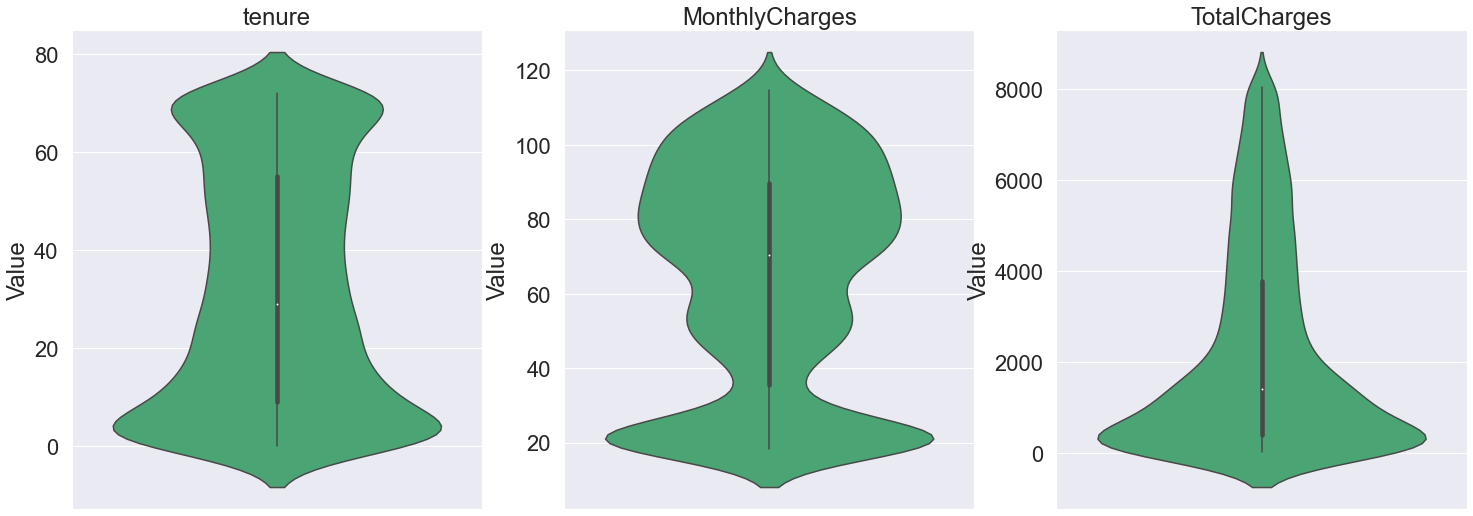

In [15]:
feature_num = list(enumerate(df[['tenure', 'MonthlyCharges', 'TotalCharges']].columns))
feature_num
plt.figure(figsize = (25,125))
sns.set(font_scale = 2)

for i in feature_num:
    plt.subplot(12,3,i[0]+1)
    sns.violinplot(y = i[1],
                   data = df,
                   color='mediumseagreen')

    plt.title(str(i[1]))
    plt.ylabel('Value')
    plt.xticks(rotation = 45)

## Review Correlated Features to Customer Value

<b>Action: </b> Review variables with high correlations (greater than 69%) and remove variables as necessary.

In [16]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.69:
            print(index,value)
            
high_corr_and_check(df)

('tenure', 'TotalCharges') 0.8261051034659136


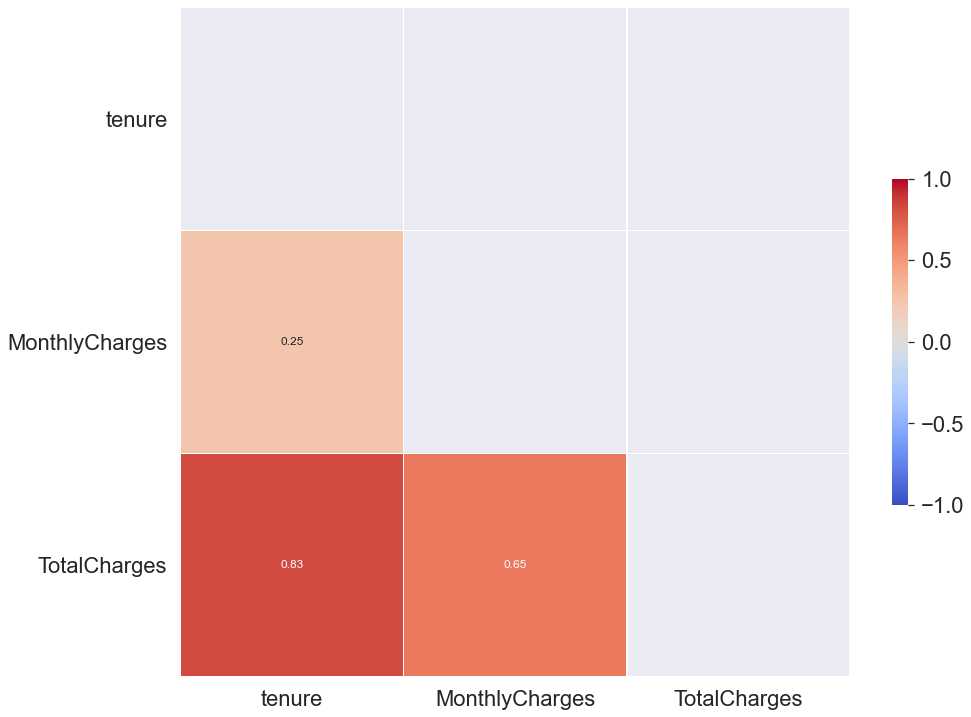

In [17]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# Visualizations

In [18]:
df['Churn'].replace({'Yes':1,'No':0},
                   inplace=True)

In [19]:
binary_cols=[]
multi_Value=[]
for col in df.columns:
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)
            
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling']

In [20]:
multi_Value

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [21]:
for col in df.dtypes[df.dtypes == object].index:
    print(col,'\n', df[col].unique())

gender 
 ['Female' 'Male']
SeniorCitizen 
 ['No' 'Yes']
Partner 
 ['Yes' 'No']
Dependents 
 ['No' 'Yes']
PhoneService 
 ['No' 'Yes']
MultipleLines 
 ['No phone service' 'No' 'Yes']
InternetService 
 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 
 ['No' 'Yes' 'No internet service']
OnlineBackup 
 ['Yes' 'No' 'No internet service']
DeviceProtection 
 ['No' 'Yes' 'No internet service']
TechSupport 
 ['No' 'Yes' 'No internet service']
StreamingTV 
 ['No' 'Yes' 'No internet service']
StreamingMovies 
 ['No' 'Yes' 'No internet service']
Contract 
 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 
 ['Yes' 'No']
PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## Multi-Value Variables

In [22]:
df.drop(columns=['StreamingTV', 'PhoneService'], inplace=True)

In [23]:
binary_cols=[]
multi_Value=[]
for col in df.columns:
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)

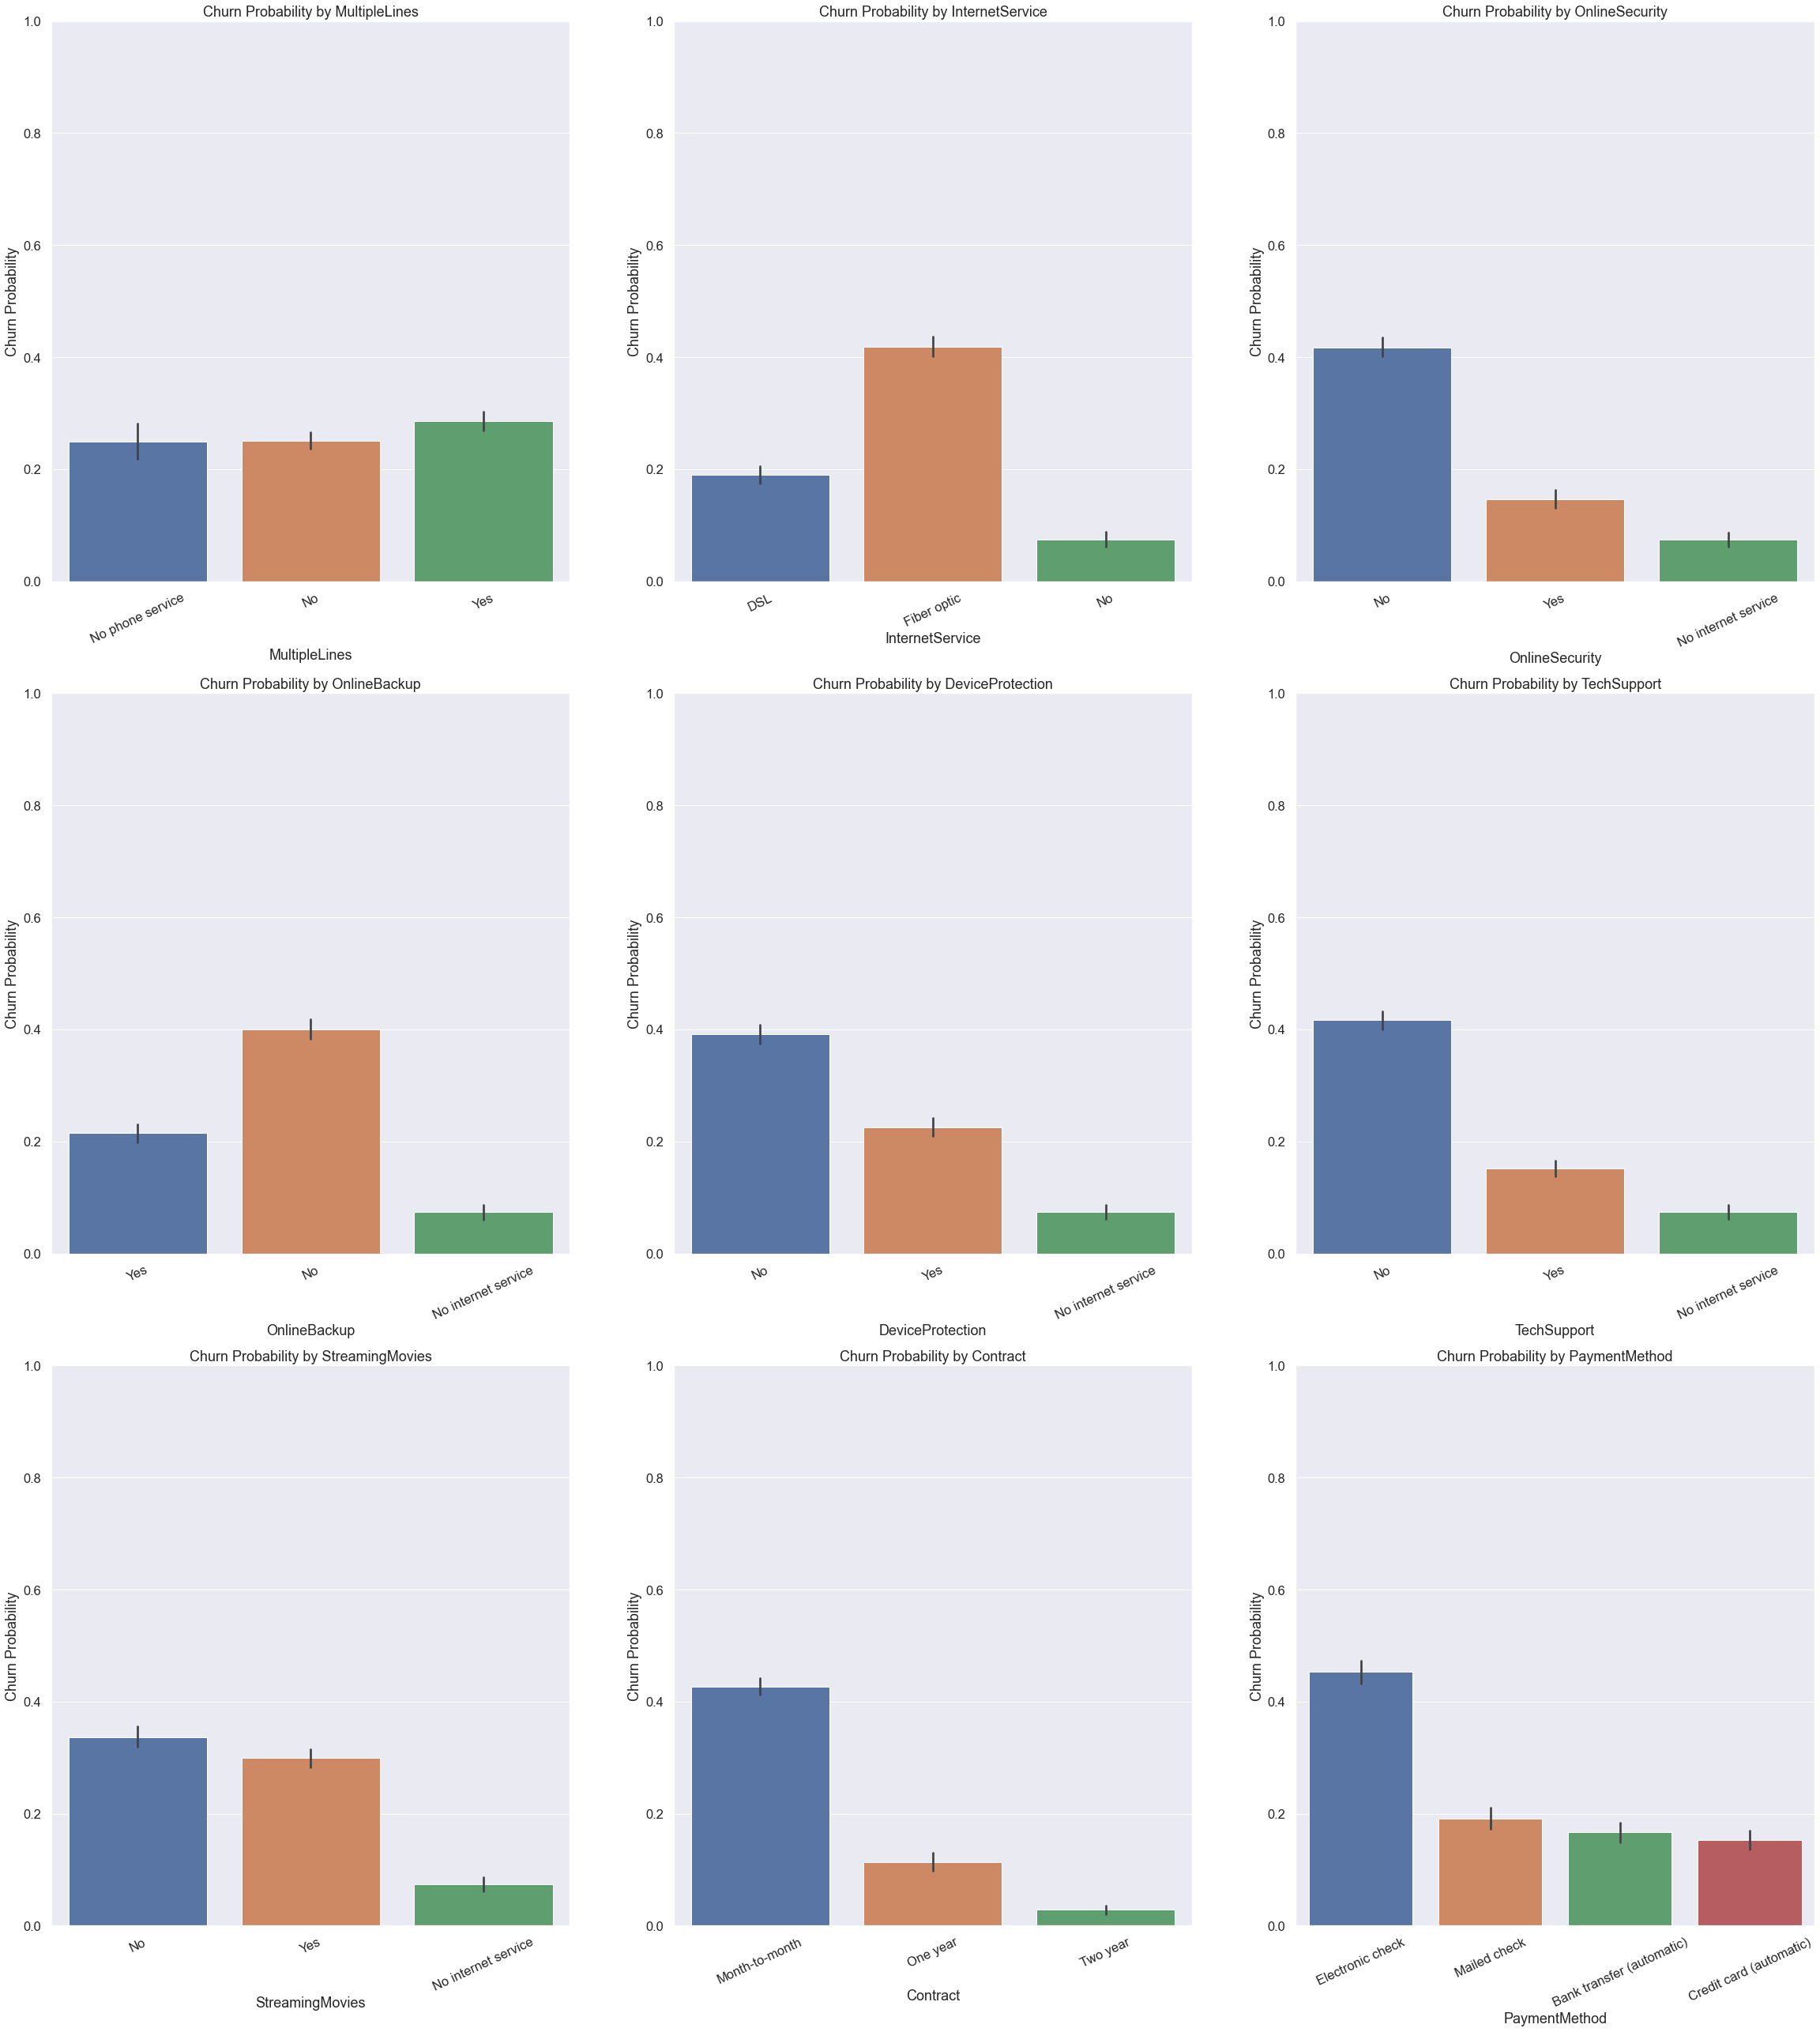

In [31]:
feature_num = list(enumerate(df[multi_Value].columns))
feature_num

plt.figure(figsize = (40,60))
sns.set(font_scale = 1.5)

for i in feature_num:
    var = i[1]
    num_cols = 3
    num_rows = 4
    plt.subplot(num_rows,num_cols,i[0]+1)
    sns.barplot(x = var,
                y='Churn',
                data = df).set(ylim=(0, 1))
     
    plt.ylabel('Churn Probability')
    plt.title('Churn Probability by '+str(i[1]))
    plt.xticks(rotation = 25)
    
plt.savefig('z. Visuals/multi_value_visuals.png')

## Binary Variables

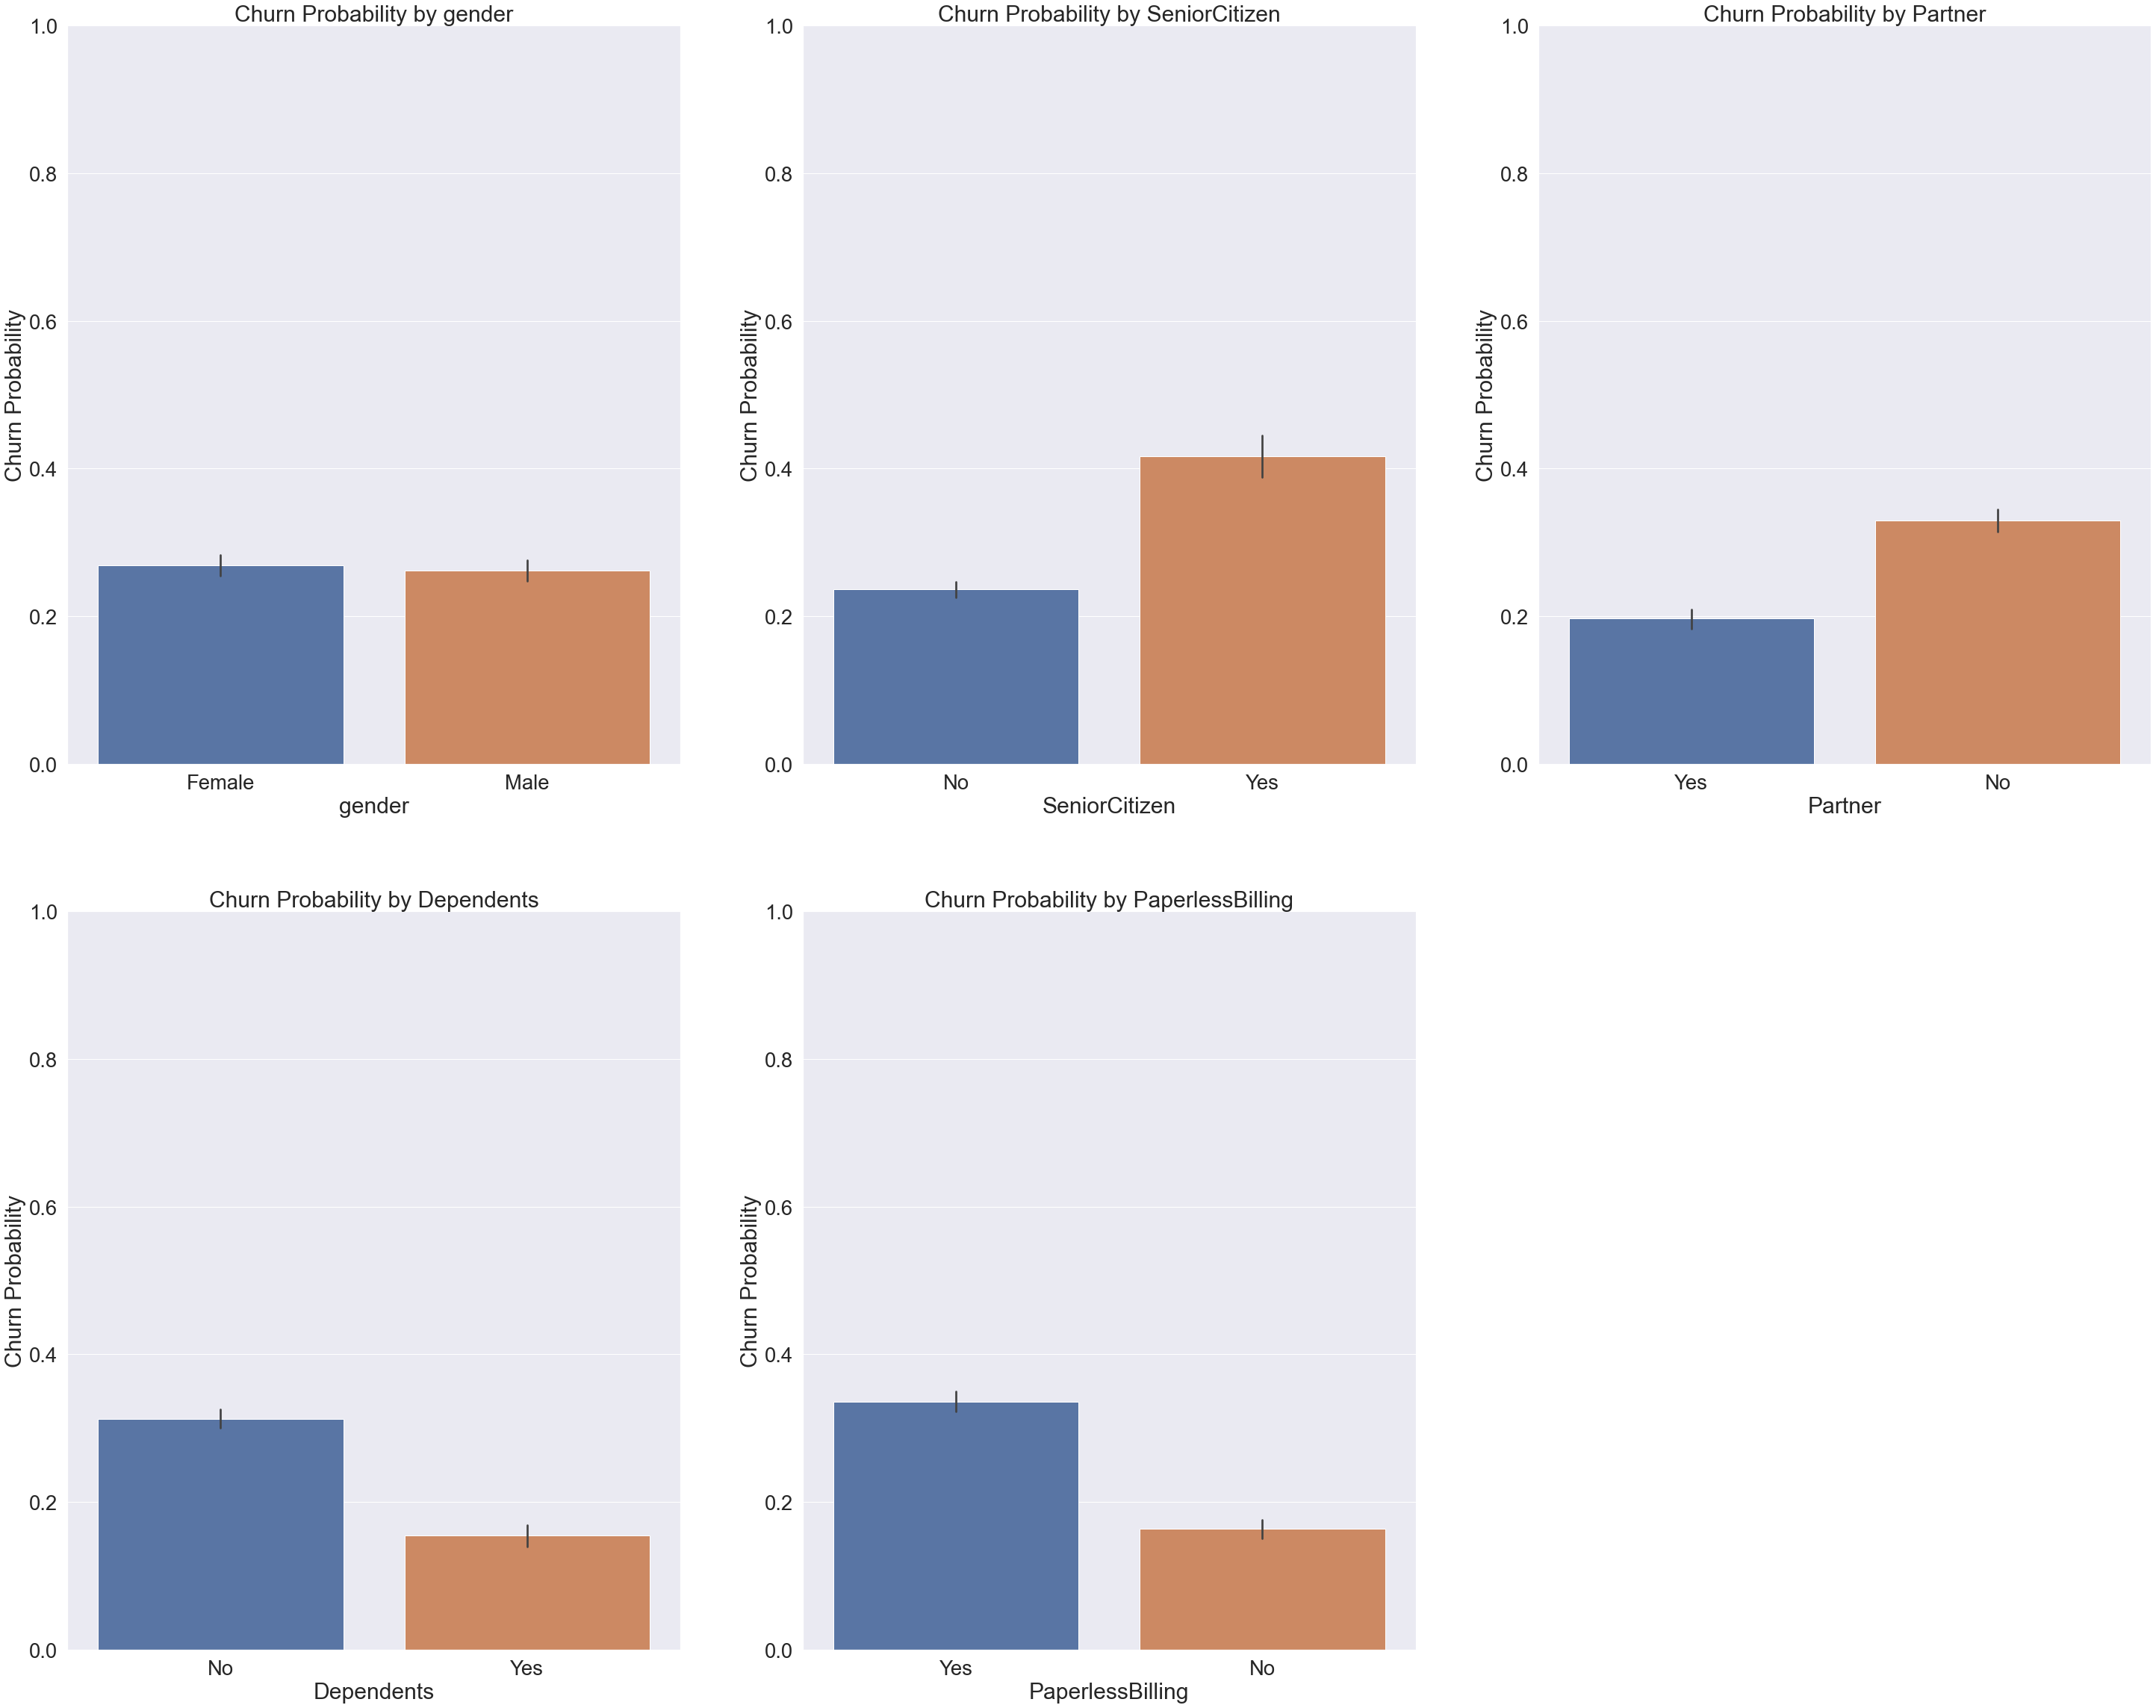

In [26]:
feature_num = list(enumerate(df[binary_cols].columns))
feature_num

plt.figure(figsize = (50,40))
sns.set(font_scale = 2.5)

for i in feature_num:
    var = i[1]
    num_cols = 3
    num_rows = 2
    plt.subplot(num_rows,num_cols,i[0]+1)
    
    sns.barplot(x = var,
                y='Churn',
                data = df).set(ylim=(0, 1))
     
    plt.ylabel('Churn Probability')
    plt.title('Churn Probability by '+str(i[1]))
    ax.set(ylim=(0, 1)) 
    
plt.savefig('z. Visuals/binary_visuals.png')

## Continuous Variables

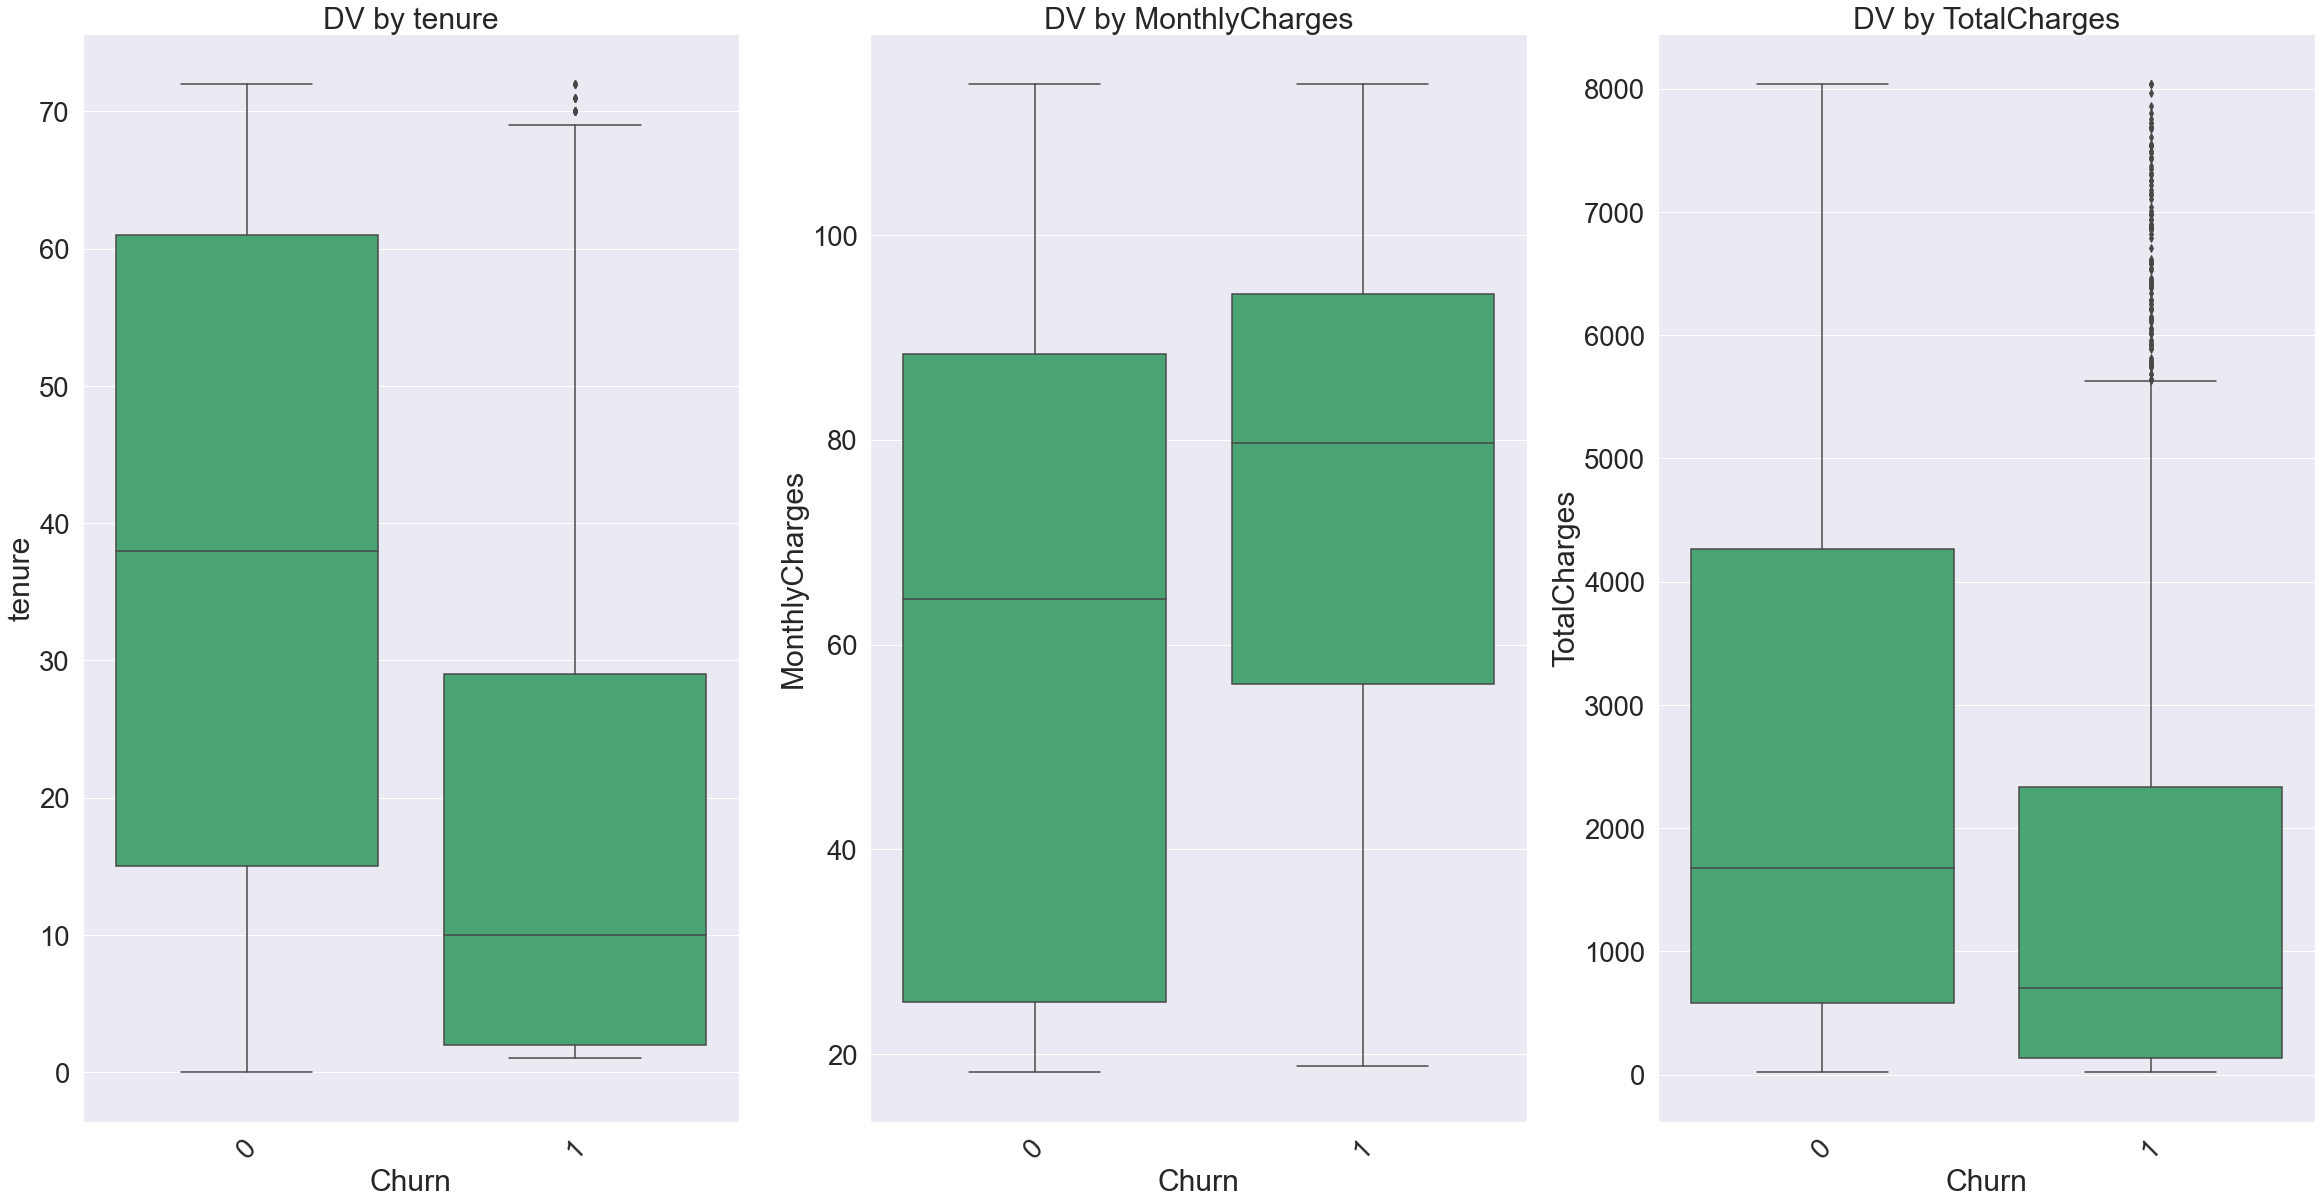

In [27]:
feature_num = list(enumerate(df[df.select_dtypes(include='number').columns[0:3]]))
feature_num

plt.figure(figsize = (40, 20))
sns.set(font_scale = 2.5)

for i in feature_num:
    num_cols = 3
    num_rows = 1
    plt.subplot(num_rows,num_cols,i[0]+1)
    sns.boxplot(y = i[1],
                x='Churn',
                data = df,
                color='mediumseagreen',
                orient='v',)
    
#     plt.ylabel('Customer Count')
    plt.title('DV by '+str(i[1]))
    plt.xticks(rotation = 45)
    
plt.savefig('z. Visuals/continuous_variable_visuals.png')

In [28]:
df[binary_cols] = df[binary_cols].replace({'No':0, 'Yes':1})

In [29]:
df.to_csv('modified/finalproject_df.csv', index=False)

# End